# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [167]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

In [168]:
import time

In [169]:
def tf_diag_part(k):
    sess = tf.compat.v1.Session()
    
    x = tf.random.uniform(shape = (k, k)) 
    y = tf.reduce_sum(tf.linalg.tensor_diag_part(x)**2)
    
    begin = time.time()
    
    sess.run(y)
    
    end = time.time()
    time_spent = end - begin
    
    sess.close()
    
    return time_spent

In [170]:
def np_diag_part(k):
    
    begin = time.time()
    
    x = np.random.uniform(size = (k, k))
    y = np.sum(np.diagonal(x)**2)
    
    end = time.time()
    time_spent = end - begin
    
    return time_spent

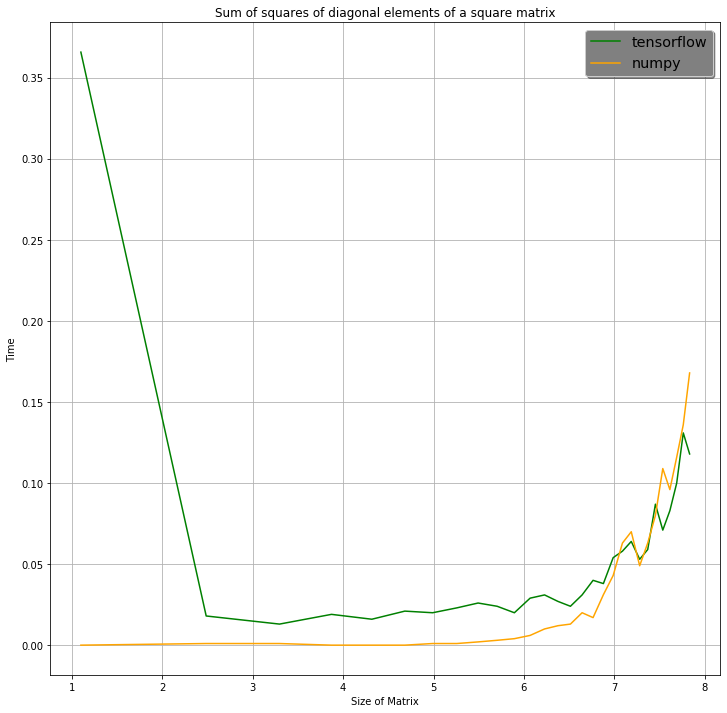

In [171]:
np.random.seed(42)
tf.compat.v1.random.set_random_seed(42)

arr = [3*i**2 for i in range(1,30)]

tf_time = []
np_time = []
for i in arr:
    tf_curr = tf_diag_part(i)
    tf_time.append(tf_curr)
    np_curr = np_diag_part(i)
    np_time.append(np_curr)
    


plt.figure(figsize = (12, 12))
        
plt.plot(np.log(arr), tf_time, label = 'tensorflow',c = 'green')
plt.plot(np.log(arr), np_time, label = 'numpy', c = 'orange')

legend = plt.legend(shadow = True, fontsize = 'x-large')
legend.get_frame().set_facecolor('gray')
        
plt.xlabel('Size of Matrix')
plt.ylabel('Time')
        
plt.grid()
plt.title('Sum of squares of diagonal elements of a square matrix')
plt.show()

In [172]:
def tf_angle(k):
    sess = tf.compat.v1.Session()

    x = tf.random.uniform(shape = (k, 1))
    y = tf.random.uniform(shape = (1, k))
    
    dot = tf.matmul(y, x)
    
    x_norm = tf.norm(x)
    y_norm = tf.norm(y)
    
    z = tf.acos(dot/(x_norm * y_norm))

    begin = time.time()
    
    sess.run(z)
    
    end = time.time()
    time_spent = end - begin
    
    sess.close()
    
    return time_spent

In [173]:
def np_angle(k):
    begin = time.time()
    
    x = np.random.uniform(size = (k, 1)) 
    y = np.random.uniform(size = (1, k))
    
    dot = np.matmul(y, x)
    
    x_norm = np.linalg.norm(x)
    y_norm = np.linalg.norm(y)
    
    z = np.arccos(dot/(x_norm * y_norm))
    
    end = time.time()
    time_spent = end - begin
    
    return time_spent

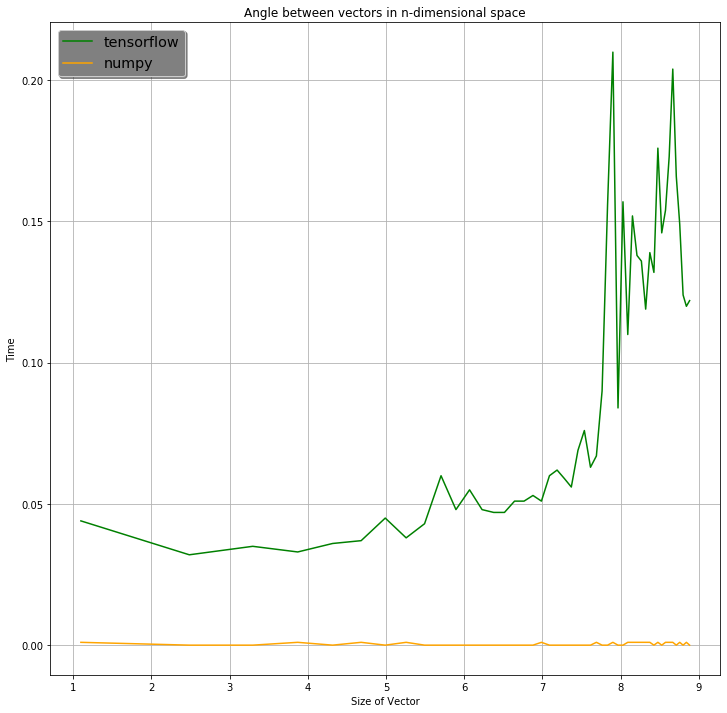

In [174]:
np.random.seed(42)
tf.compat.v1.random.set_random_seed(42)

arr = [3*i**2 for i in range(1,50)]

tf_time = []
np_time = []
for i in arr:
    tf_curr = tf_angle(i)
    tf_time.append(tf_curr)
    np_curr = np_angle(i)
    np_time.append(np_curr)
    
    
plt.figure(figsize = (12, 12))
        
plt.plot(np.log(arr), tf_time, label = 'tensorflow', c = 'green')
plt.plot(np.log(arr), np_time, label = 'numpy', c = 'orange')

legend = plt.legend(shadow = True, fontsize = 'x-large')
legend.get_frame().set_facecolor('gray')
        
plt.xlabel('Size of Vector')
plt.ylabel('Time')
        
plt.grid()
plt.title('Angle between vectors in n-dimensional space')
plt.show()

# В этих двух кейсах, Numpy работает быстрее, чем TensorFlow, так как TF тратит время на создание статичного графа для вычислений, и вообще предназначен для вычислений тензоров большего размера. Последнее заметно и из первого графика, когда при увеличении размерности скорость вычислений на Numpy становится медленнее.

In [175]:
def tf_commutator(k):
    sess = tf.compat.v1.Session()
    
    a = tf.random.uniform(shape = (k, k)) 
    b = tf.random.uniform(shape = (k, k)) 
    
    ab = tf.matmul(a, b)
    ba = tf.matmul(b, a)
    
    c = ab - ba

    begin = time.time()
    
    sess.run(c)
    
    end = time.time()
    time_spent = end - begin
    
    sess.close()
    
    return time_spent

In [176]:
def np_commutator(k):
    begin = time.time()
    
    a = np.random.uniform(size = (k, k))
    b = np.random.uniform(size = (k, k))
    
    ab = np.matmul(a, b)
    ba = np.matmul(b, a)
    
    c = ab - ba
    
    end = time.time()
    time_spent = end - begin
    return time_spent

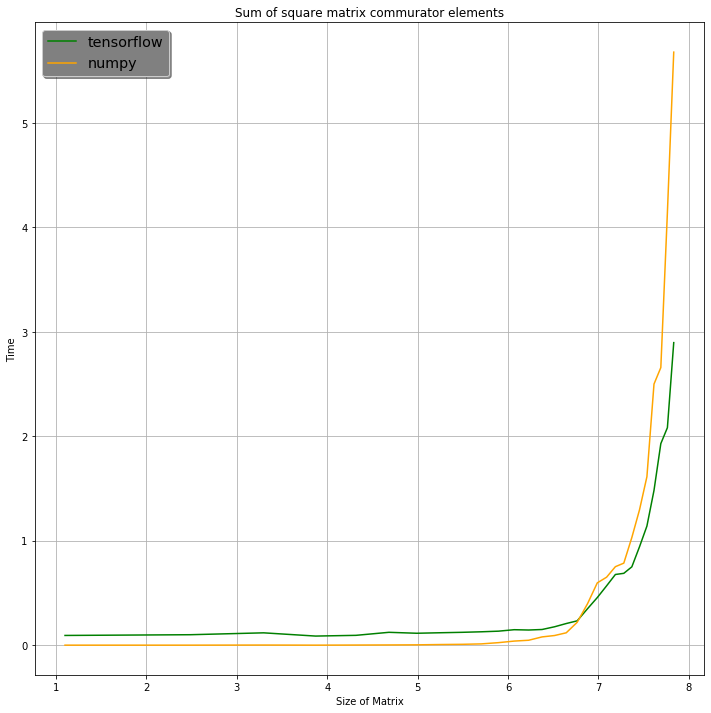

In [177]:
np.random.seed(42)
tf.compat.v1.random.set_random_seed(42)

arr = [3*i**2 for i in range(1,30)]

tf_time = []
np_time = []
for i in arr:
    tf_curr = tf_commutator(i)
    tf_time.append(tf_curr)
    np_curr = np_commutator(i)
    np_time.append(np_curr)
    
    
plt.figure(figsize = (12, 12))
        
plt.plot(np.log(arr), tf_time, label = 'tensorflow', c = 'green')
plt.plot(np.log(arr), np_time, label = 'numpy', c = 'orange')

legend = plt.legend(shadow = True, fontsize = 'x-large')
legend.get_frame().set_facecolor('gray')
        
plt.xlabel('Size of Matrix')
plt.ylabel('Time')
        
plt.grid()
plt.title('Sum of square matrix commurator elements')
plt.show()

# При малом количестве элементов Numpy работает быстрее, чем tensorflow. Но, если для данных нужно выполнить много вычислений, то tensorflow работает быстрее. Скорее всего, это связана с тем, что время передачи системного графического процессора становится незначительным по отношению к фактическому времени вычислений.

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [178]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [179]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

In [180]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

In [222]:
learning_rate = 0.01
momentum = [0.2*i for i in range(1, 5)]
result = {}
for k in momentum:
    momentum_optimizer = tf.train.MomentumOptimizer(learning_rate, k)
    result[k] = train(X, y, momentum_optimizer.minimize(loss))

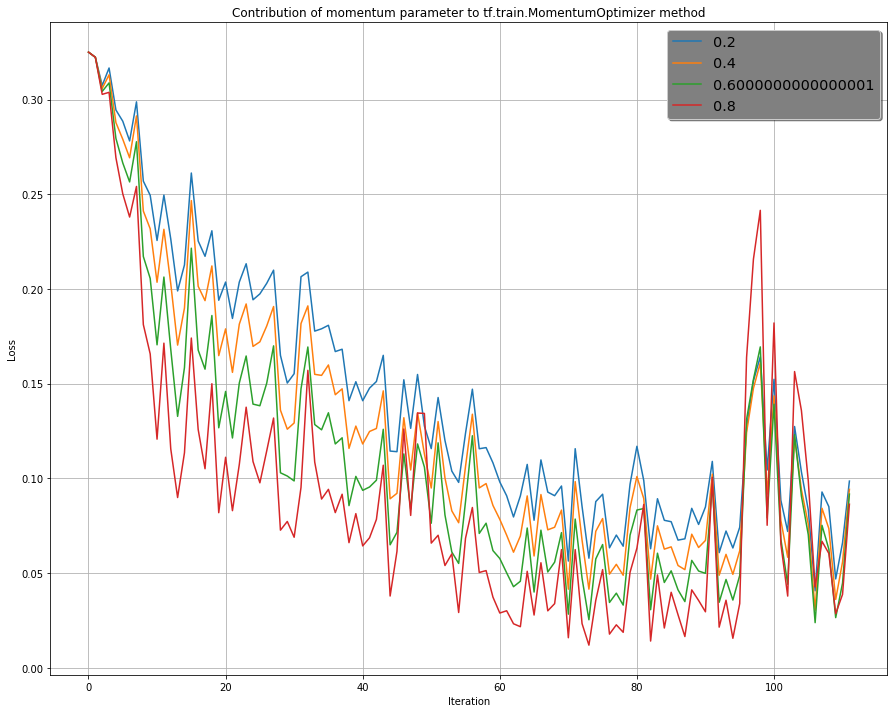

In [223]:
plt.figure(figsize = (15, 12))
for k in result:
    plt.plot(np.arange(len(result[k])), result[k], label = k)
    
plt.xlabel('Amount of iterations')
plt.ylabel('Loss')

legend = plt.legend(shadow = True, fontsize = 'x-large', loc = 'best')
legend.get_frame().set_facecolor('gray')

plt.grid()

plt.title('Сontribution of momentum parameter to tf.train.MomentumOptimizer method')
plt.show()

# Ваш ответ: Красный график имеет наибольшее значение параметра momentum и имеет наименьшую ошибку. Однако, чем больше количество сделанных итераций, то мы становимся ближе к какому-то локальному минимуму. Из-за большого параметра momentum мы перепрыгиваем  этот локальный минимум, так как происходит изменение предыдущего веса.

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

In [246]:
momentum = 0.9
learning_rates = [0.01*i for i in range(1, 10, 2)]
result = {}
for k in learning_rates:
    momentum_optimizer = tf.train.MomentumOptimizer(k, momentum)
    result[k] = train(X, y, momentum_optimizer.minimize(loss))

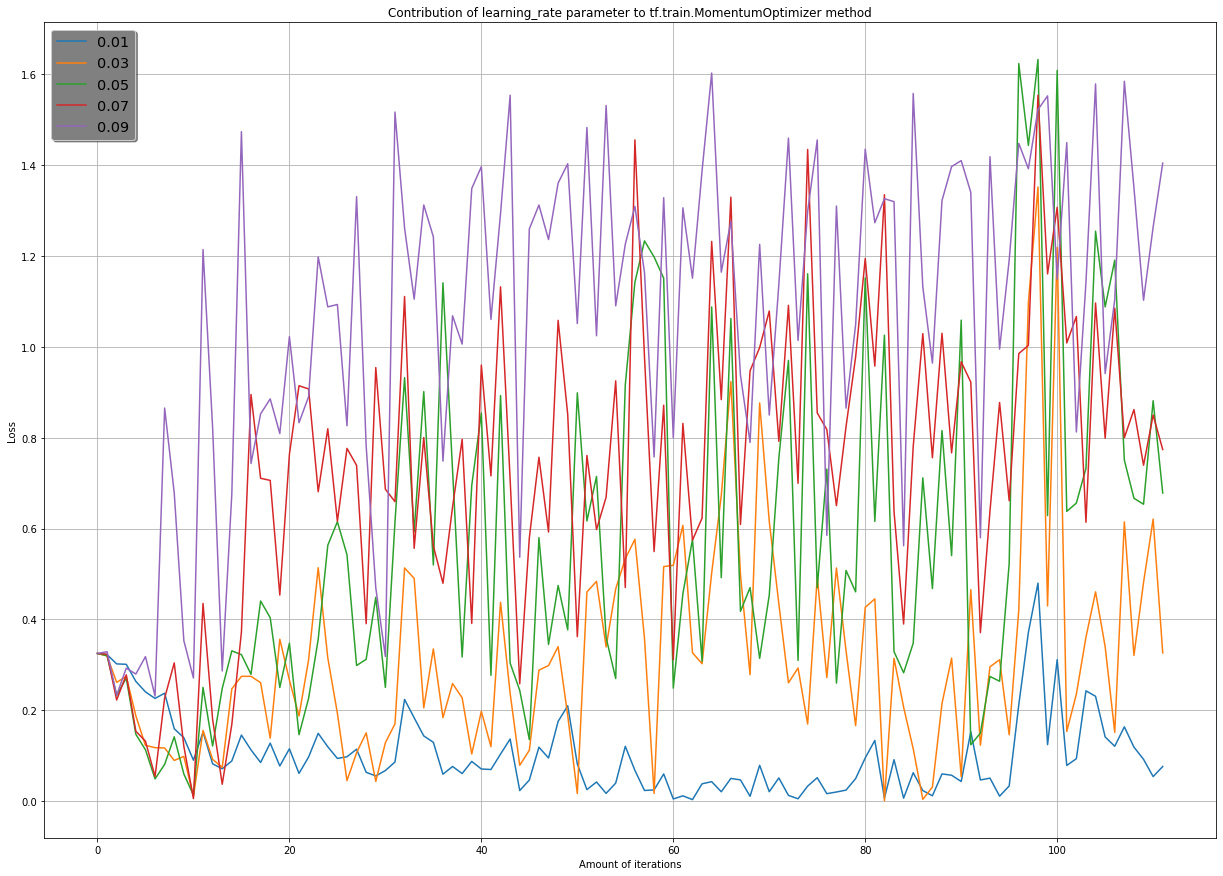

In [247]:
plt.figure(figsize = (21, 15))
for k in result:
    plt.plot(np.arange(len(result[k])), result[k], label = k)
    
plt.xlabel('Amount of iterations')
plt.ylabel('Loss')

legend = plt.legend(shadow = True, fontsize = 'x-large', loc = 'best')
legend.get_frame().set_facecolor('gray')

plt.grid()

plt.title('Сontribution of learning_rate parameter to tf.train.MomentumOptimizer method')
plt.show()

# Ваш ответ: Исходя из графика, можно сделать вывод, что при слишком большом параметре learning_rate имеем наибольшую ошибку, а при наименьшем (=0.01) ошибка минимальна. Значит, длина шага градиентного спуска, при котором алгоритм сходится быстрее примерно равен 0.01

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

In [249]:
learning_rates = [0.01*i for i in range(1, 10, 2)]
result = {}
for k in learning_rates:
    Adam_optimizer = tf.train.AdamOptimizer(k)
    result[k] = train(X, y, Adam_optimizer.minimize(loss))

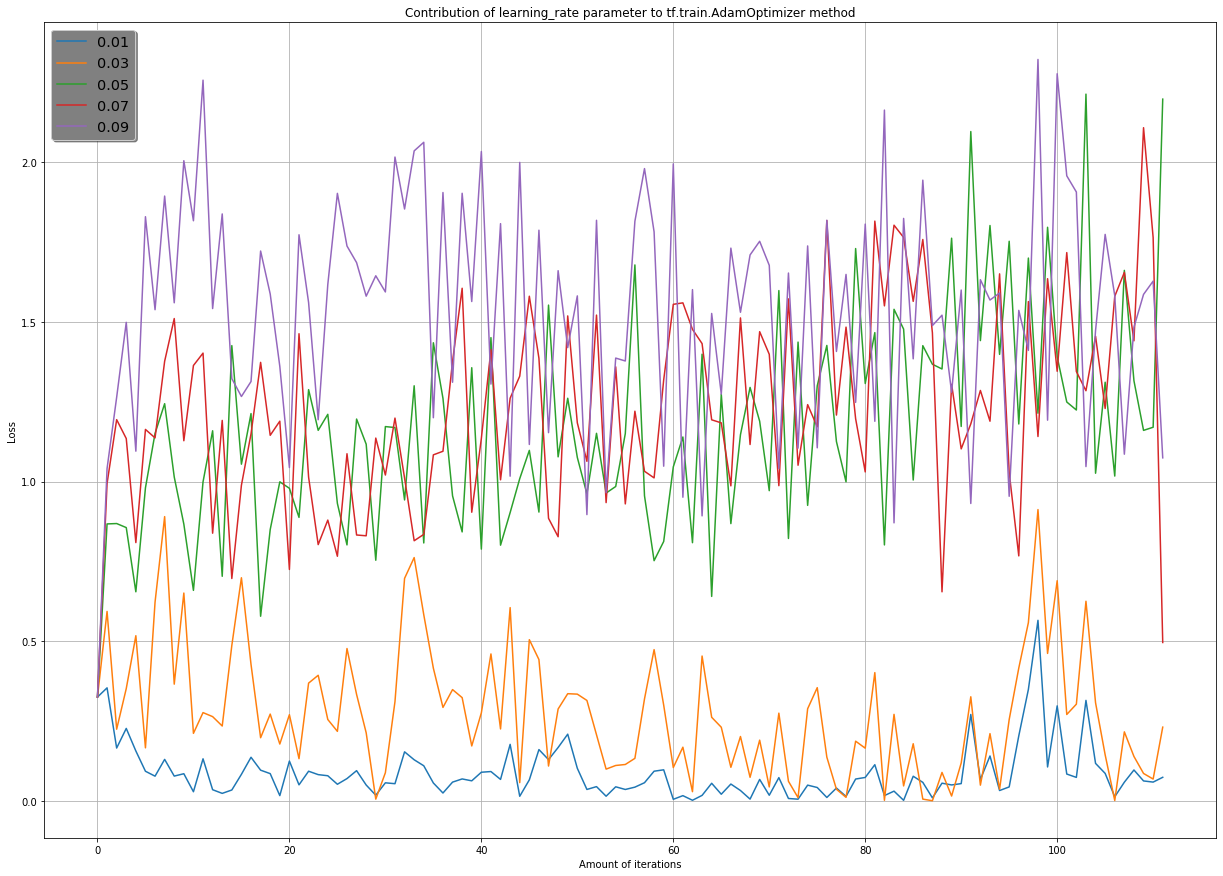

In [250]:
plt.figure(figsize = (21, 15))
for k in result:
    plt.plot(np.arange(len(result[k])), result[k], label = k)
    
plt.xlabel('Amount of iterations')
plt.ylabel('Loss')

legend = plt.legend(shadow = True, fontsize = 'x-large', loc = 'best')
legend.get_frame().set_facecolor('gray')

plt.grid()

plt.title('Сontribution of learning_rate parameter to tf.train.AdamOptimizer method')
plt.show()

# Ваш ответ: Наименьшая ошибка алгоритма достигается при learning_rate = 0.01, наибольшая при 0.09. Значит, кэффицент скорости обучения градиентного спуска, при котором алгоритм сходится быстрее лучше взять в районе 0.01

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

In [261]:
momentum = 0.9
learning_rates = [0.01*i for i in range(1, 10, 4)]
result_adam = {}
result_momentum = {}
for k in learning_rates:
    Adam_optimizer = tf.train.AdamOptimizer(k)
    result_adam[k] = train(X, y, Adam_optimizer.minimize(loss))
    
    momentum_optimizer = tf.train.MomentumOptimizer(k, momentum)
    result_momentum[k] = train(X, y, momentum_optimizer.minimize(loss))

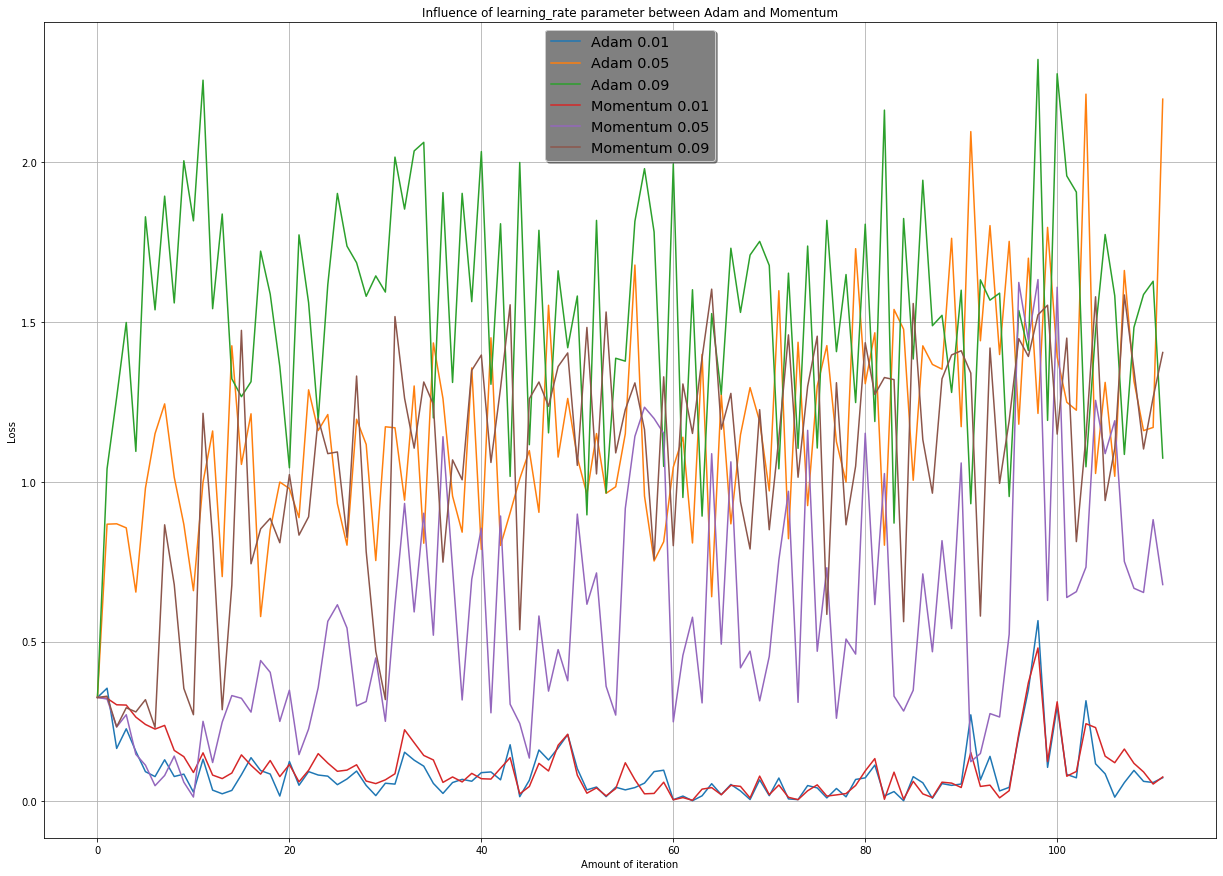

In [263]:
plt.figure(figsize=(21, 15))
for k in learning_rates:
    plt.plot(np.arange(len(result_adam[k])), result_adam[k], label = 'Adam' + ' ' + str(k))
for k in learning_rates:
    plt.plot(np.arange(len(result_momentum[k])), result_momentum[k], label = 'Momentum' + ' ' + str(k))
    

plt.xlabel('Amount of iterations')
plt.ylabel('Loss')

legend = plt.legend(shadow = True, fontsize = 'x-large', loc = 'best')
legend.get_frame().set_facecolor('gray')

plt.grid()
plt.title('Influence of learning_rate parameter between Adam and Momentum')
plt.show()

# Ваш ответ: наименьшие значения learning_rate в алгоритмах дают наименьшую ошибку. Однако, если сопоставлять поведение графиков при одинаковых параметрах, например, при 0.05, то , в данном случае, Momentum на протяжении всех итераций выигрывает у Adam.

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [264]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

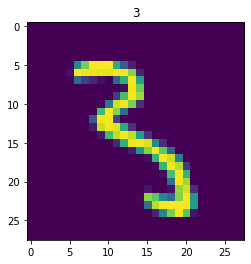

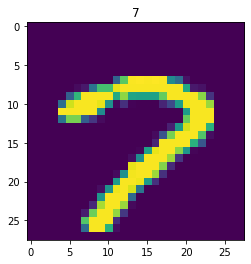

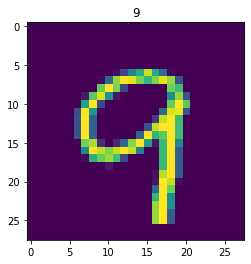

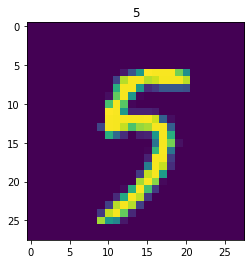

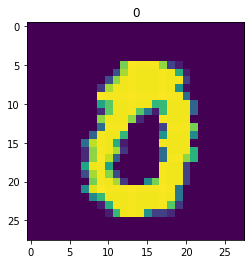

In [267]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [298]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=200):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(5):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]

np.random.seed(43)
np.random.shuffle(X_train)

np.random.seed(43)
np.random.shuffle(y_train)

tf.random.set_random_seed(43)

layer_1 = tf.layers.dense(inputs=X_input, units = 500, activation=tf.nn.relu)
layer_2 = tf.layers.dense(inputs=layer_1, units = 380, activation=tf.nn.relu)
layer_3 = tf.layers.dense(inputs=layer_2, units = 228, activation=tf.nn.relu)
layer_4 = tf.layers.dense(inputs=layer_3, units = 180, activation=tf.nn.relu)
layer_5 = tf.layers.dense(inputs=layer_4, units = 96, activation=tf.nn.relu)
layer_6 = tf.layers.dense(inputs=layer_5, units = 48, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=layer_6, units = 10, activation=None)

predicted = tf.nn.softmax(logits=logits, axis=1)
ohe = tf.one_hot(y_input, 10)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=ohe, logits=logits))
train_op = tf.train.AdamOptimizer(learning_rate = 0.0005).minimize(loss)

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  0.9756


# 1. Увеличил размер бача до 200.
# 2. Количество эпох - 5.
# 3. 6 слоёв.
# 4. Функция активации - relu.
# 5. Learning_rate = 0.0005.

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

<img src="mem.png" style="height:500px">

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

# Интересная вещь, но хочу PyTorch((9(. Говорят там лучше...